In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic =pd.read_csv("train.csv")

In [ ]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
"""
Data description:

Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
Name - Name
Sex - Sex
Age - Age
Sibsp - Number of Siblings/Spouses Aboard
Parch - Number of Parents/Children Aboard
Ticket - Ticket Number
Fare - Passenger Fare
Cabin - Cabin
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
"""

'\nData description:\n\nSurvival - Survival (0 = No; 1 = Yes). Not included in test.csv file.\nPclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)\nName - Name\nSex - Sex\nAge - Age\nSibsp - Number of Siblings/Spouses Aboard\nParch - Number of Parents/Children Aboard\nTicket - Ticket Number\nFare - Passenger Fare\nCabin - Cabin\nEmbarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)\n'

# EDA

In [ ]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
for col in ['Age', 'SibSp', 'Parch', 'Fare']:
  min_val, max_val = titanic[col].min(), titanic[col].max()
  print(f'Minimum value of {col} is {min_val} and Maximum value of {col} is {max_val}')

Minimum value of Age is 0.42 and Maximum value of Age is 80.0
Minimum value of SibSp is 0 and Maximum value of SibSp is 8
Minimum value of Parch is 0 and Maximum value of Parch is 6
Minimum value of Fare is 0.0 and Maximum value of Fare is 512.3292


In [ ]:
for col in ['SibSp', 'Parch', 'Pclass', 'Sex', 'Embarked']:
  vals = titanic[col].unique()
  print(f'Unique values/classes in {col} are {vals}' )

Unique values/classes in SibSp are [1 0 3 4 2 5 8]
Unique values/classes in Parch are [0 1 2 5 3 4 6]
Unique values/classes in Pclass are [3 1 2]
Unique values/classes in Sex are ['male' 'female']
Unique values/classes in Embarked are ['S' 'C' 'Q' nan]


In [ ]:
titanic[titanic.Fare == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


In [ ]:
titanic[titanic.Fare == 0].shape

(15, 12)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

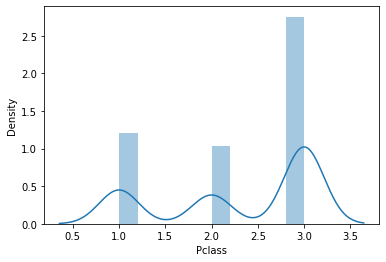

In [ ]:
sns.distplot(titanic.Pclass)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

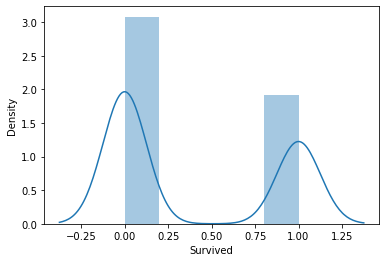

In [ ]:
sns.distplot(titanic.Survived)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

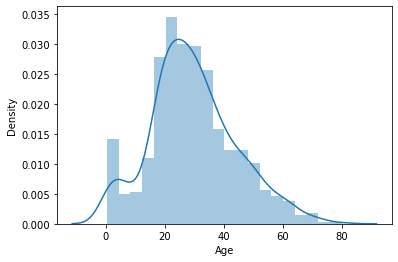

In [ ]:
sns.distplot(titanic.Age)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(139, 12)


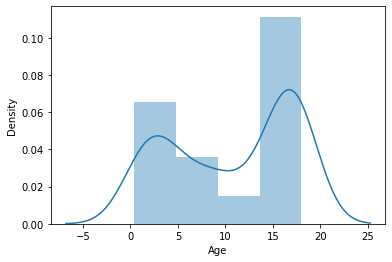

In [ ]:
children = titanic[titanic['Age'] <= 18]
sns.distplot(children.Age)
print(children.shape)

(575, 12)


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


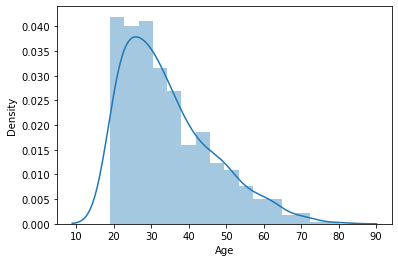

In [ ]:
adults = titanic[titanic['Age'] > 18]
sns.distplot(adults.Age)
print(adults.shape)

male      577
female    314
Name: Sex, dtype: int64

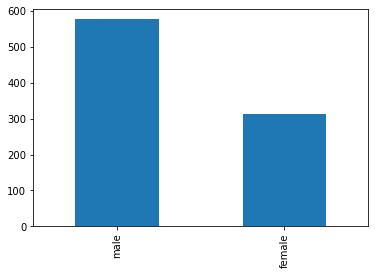

In [ ]:
titanic.Sex.value_counts().plot(kind='bar')
titanic.Sex.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

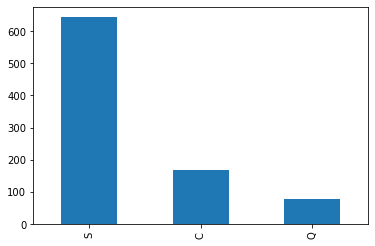

In [ ]:
titanic.Embarked.value_counts().plot(kind='bar')
titanic.Embarked.value_counts()

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

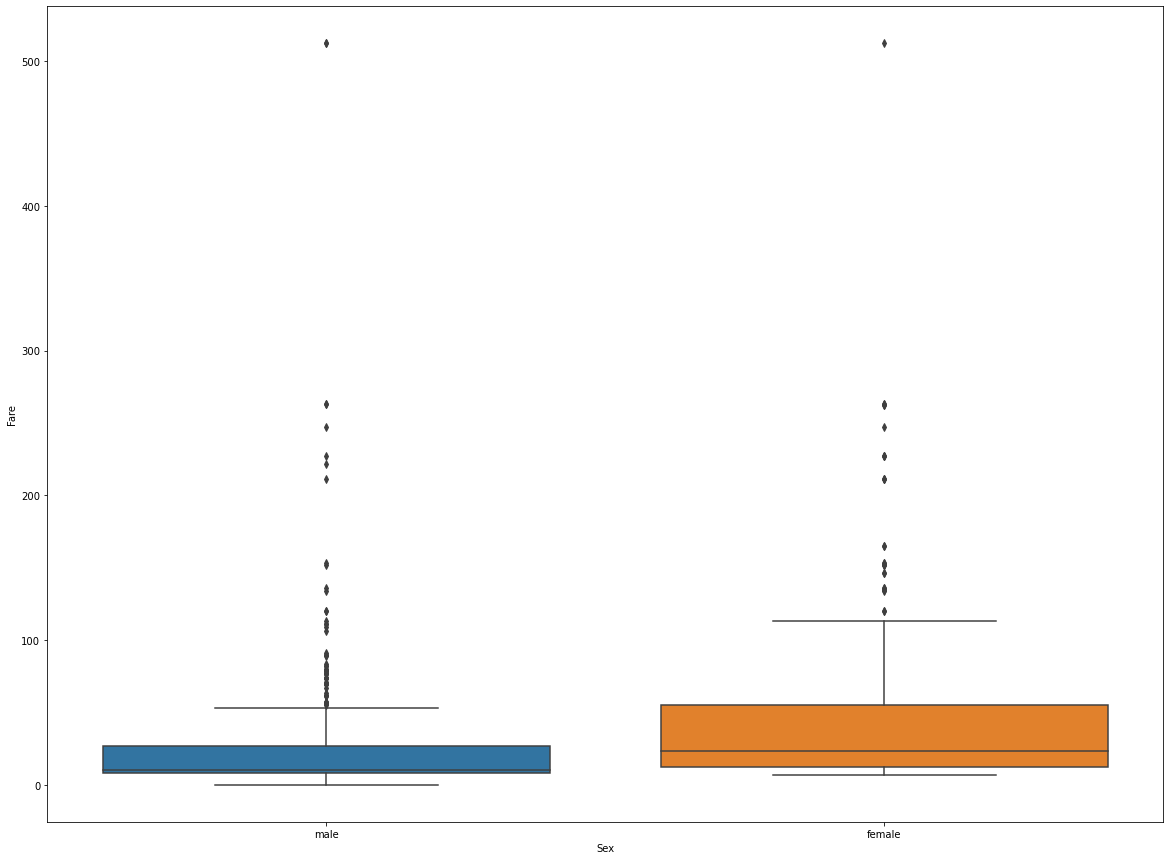

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Sex', y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

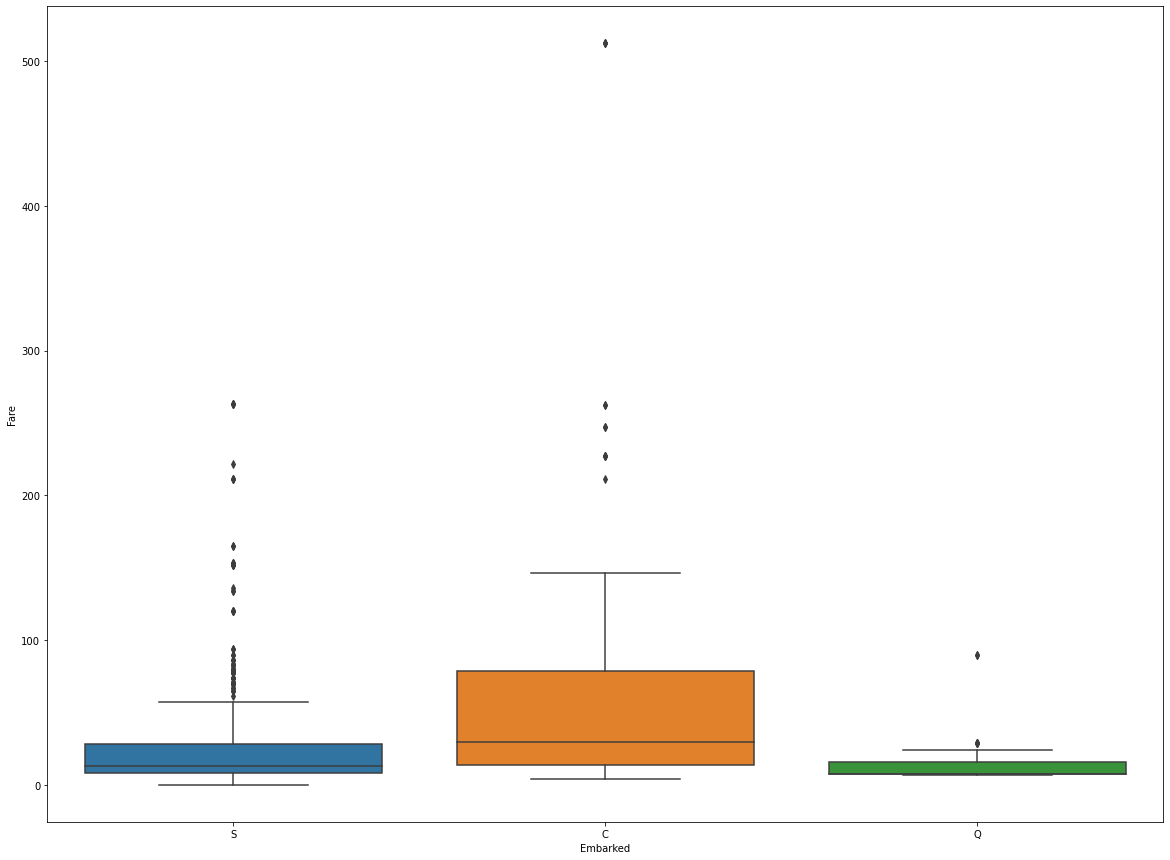

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Embarked', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

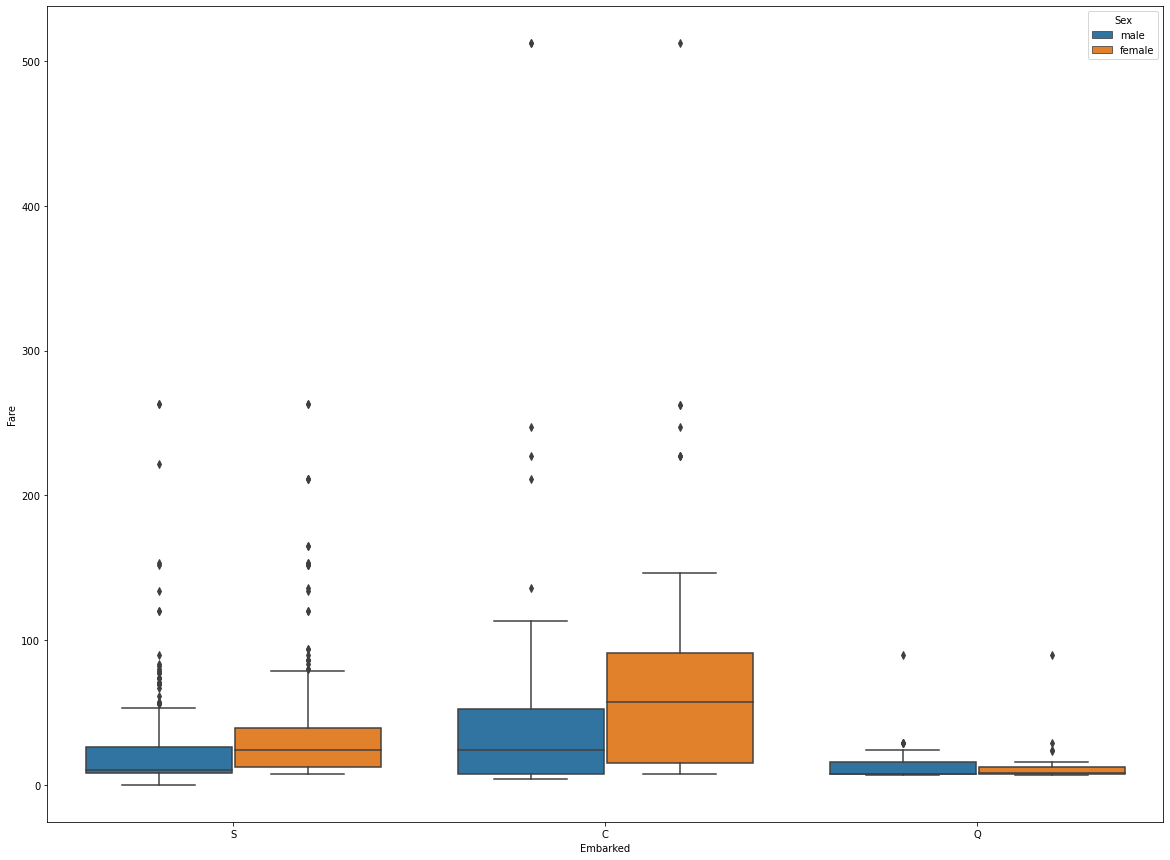

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Embarked', y = 'Fare',hue = 'Sex', data = titanic)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

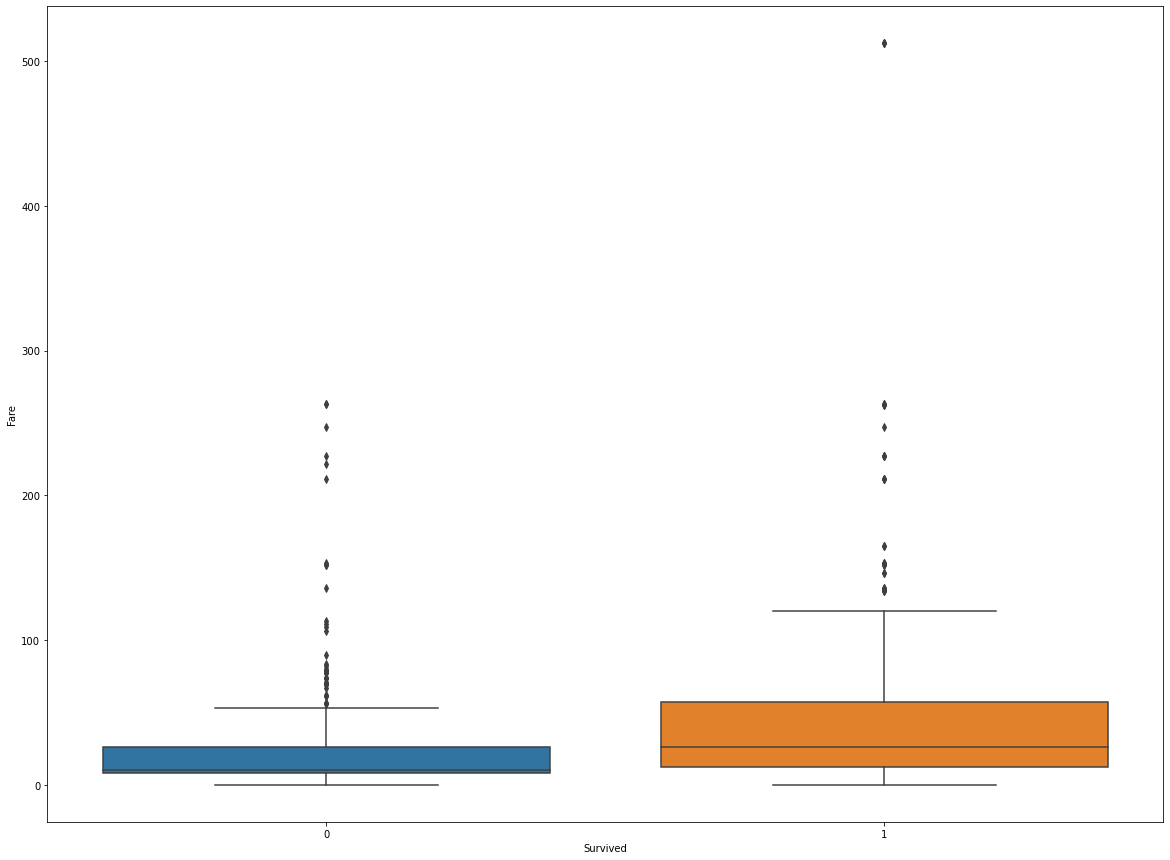

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Survived', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

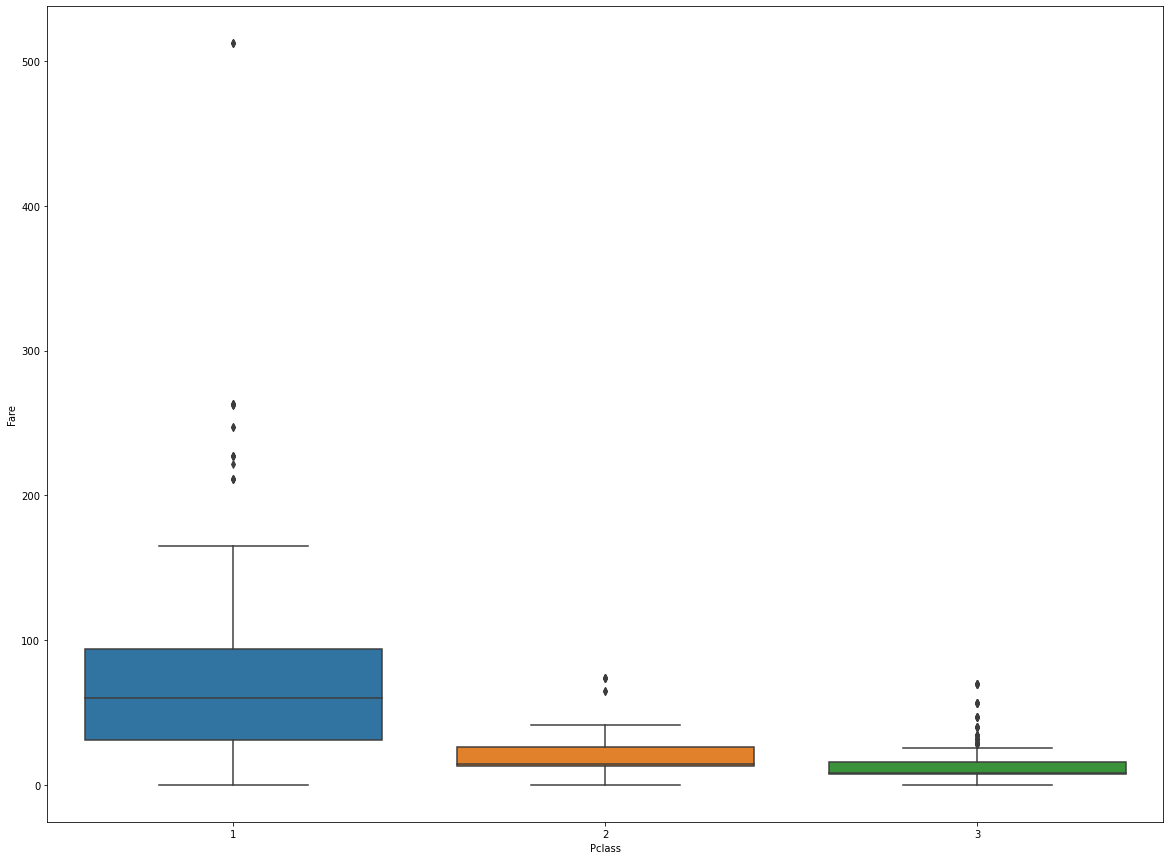

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Pclass', y = 'Fare', data = titanic)

<AxesSubplot:xlabel='Parch', ylabel='Fare'>

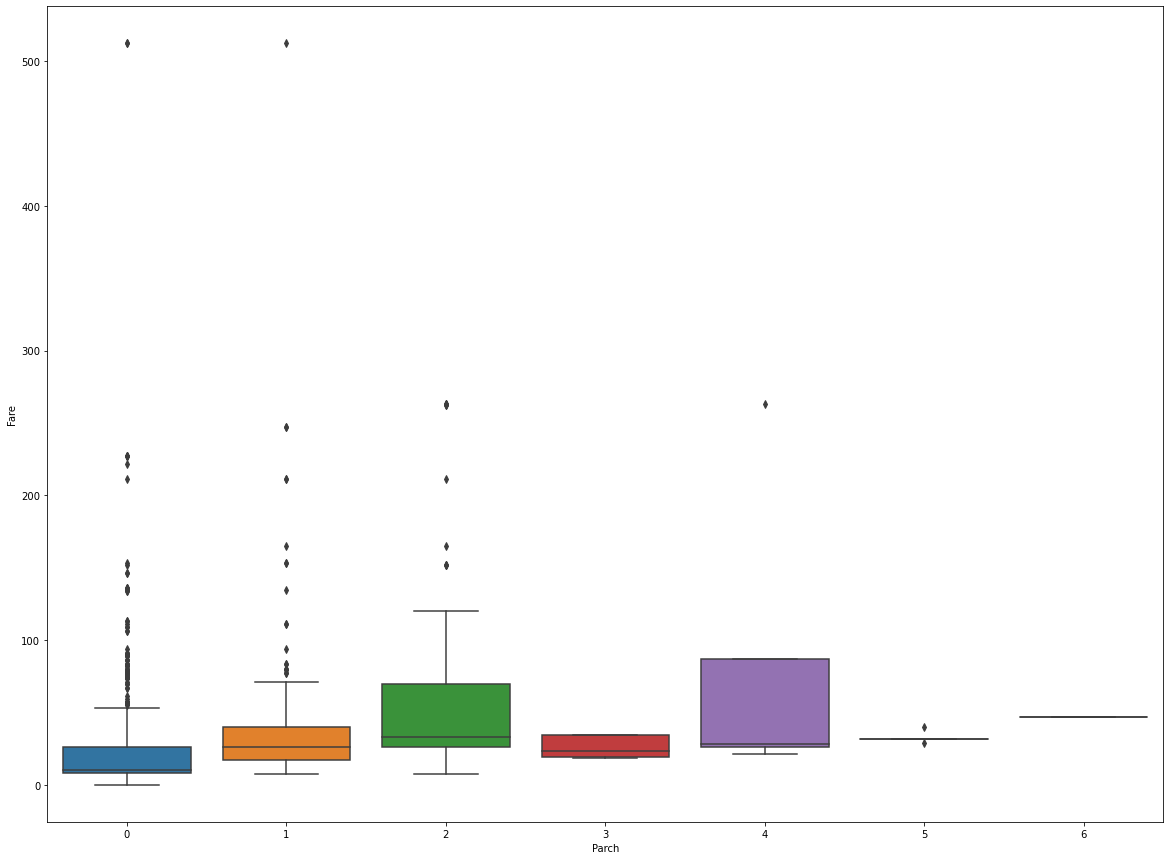

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'Parch', y = 'Fare', data = titanic) 

<AxesSubplot:xlabel='SibSp', ylabel='Fare'>

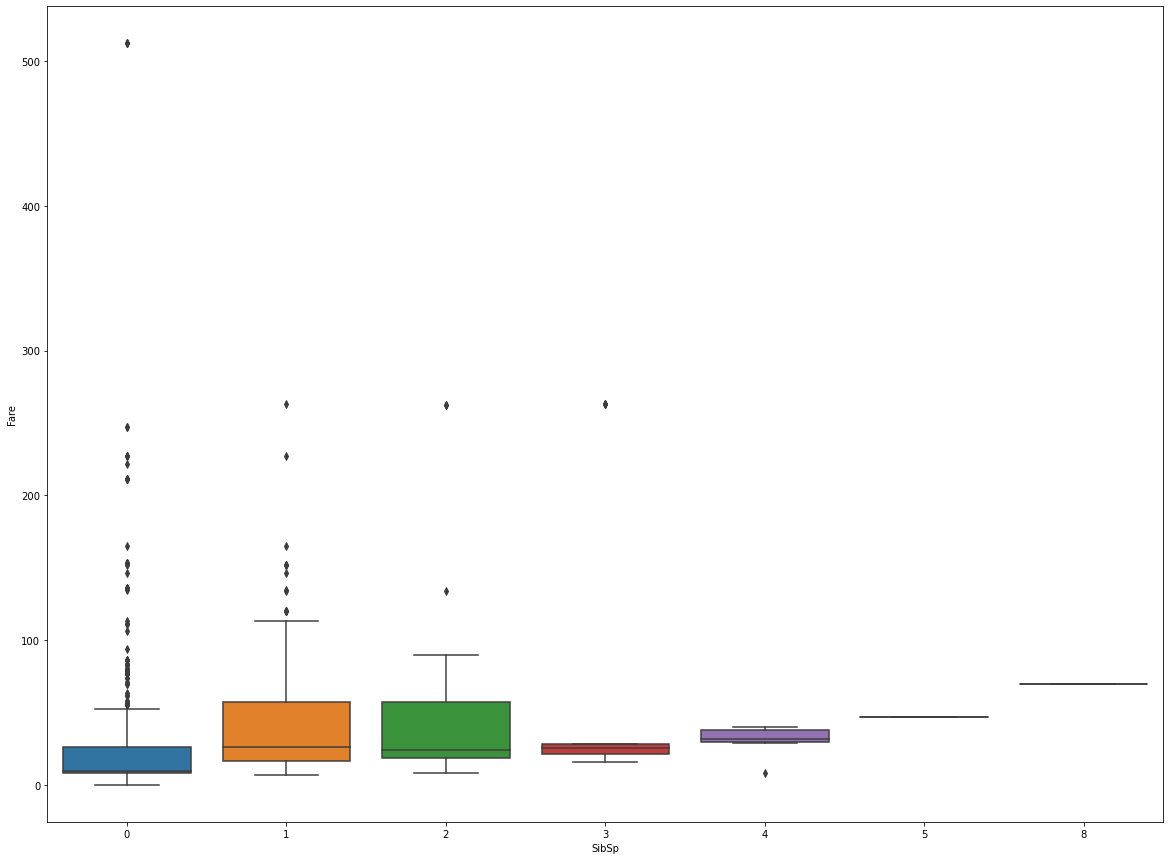

In [ ]:
plt.figure(figsize = (20,15))
sns.boxplot(x = 'SibSp', y = 'Fare', data = titanic) 

32.50072086330936

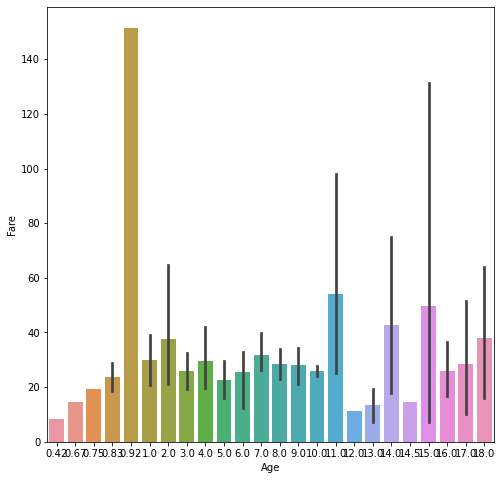

In [ ]:
plt.figure(figsize = (8,8))
sns.barplot(x = 'Age', y = 'Fare', data = children) 
children.Fare.mean()

35.22483965217383

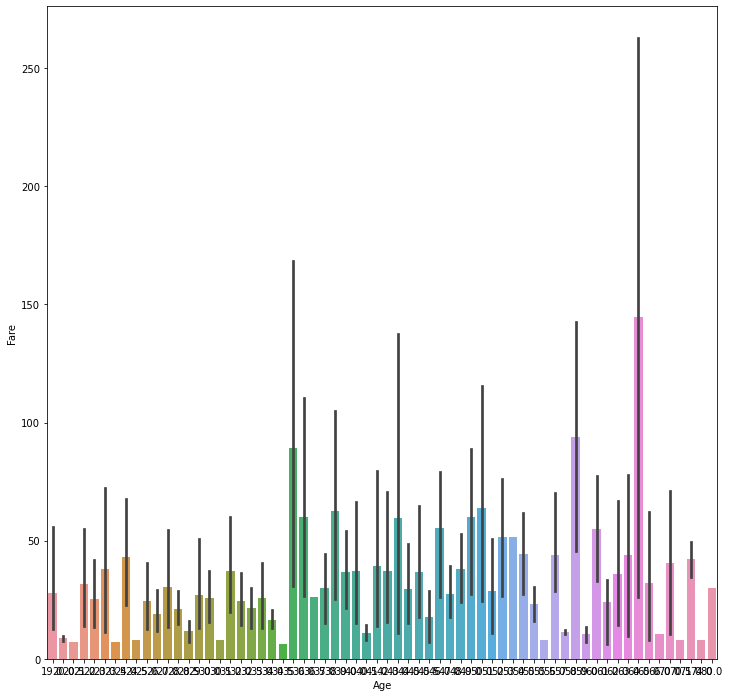

In [ ]:
plt.figure(figsize = (12,12))
sns.barplot(x = 'Age', y = 'Fare', data = adults)
adults.Fare.mean()

In [ ]:
titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
# correlation value between -1 and -0.5 signifies high negative correlation or inverse relationship
# correlation value between -0.5 and 0.5 signifies no correlation
# correlation value between 0.5 and 1 signifies high positive correlation or proportional relationship

# correlation value between -1 and -0.8 signifies high negative correlation or inverse relationship
# correlation value between -0.8 and 0.8 signifies no correlation
# correlation value between 0.8 and 1 signifies high positive correlation or proportional relationship

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:title={'center':'Correlation of Numerical Variable including Target variable'}>

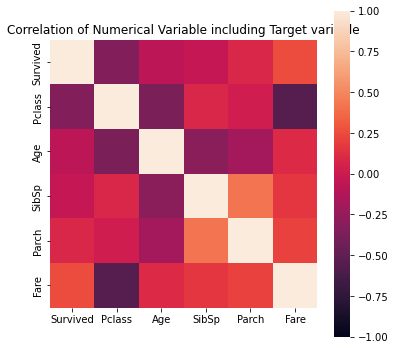

In [ ]:
f, ax= plt.subplots(figsize = (6,6))
plt.title("Correlation of Numerical Variable including Target variable")
sns.heatmap(titanic[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr(), square=True, vmin=-1, vmax=1)

In [ ]:
titanic[titanic.Sex == 'male'].Fare.median(), titanic[titanic.Sex == 'female'].Fare.median()

(10.5, 23.0)

In [ ]:
titanic[titanic.Sex == 'male'].Fare.mean(), titanic[titanic.Sex == 'female'].Fare.mean()

(25.523893414211418, 44.47981783439487)

In [ ]:
#Interquartile range:
print("For male:", np.percentile(titanic[titanic.Sex == 'male'].Fare, 25), ".", np.percentile(titanic[titanic.Sex == 'male'].Fare, 75))
print("for female:", np.percentile(titanic[titanic.Sex == 'female'].Fare, 25), ",", np.percentile(titanic[titanic.Sex == 'female'].Fare, 75))

For male: 7.8958 . 26.55
for female: 12.071875 , 55.0


In [ ]:
titanic[titanic.Embarked == 'S'].Fare.median(), titanic[titanic.Embarked == 'C'].Fare.median(), titanic[titanic.Embarked == 'Q'].Fare.median()

(13.0, 29.7, 7.75)

In [ ]:
titanic[titanic.Embarked == 'S'].Fare.mean(), titanic[titanic.Embarked == 'C'].Fare.mean(), titanic[titanic.Embarked == 'Q'].Fare.mean()

(27.07981180124218, 59.95414404761905, 13.276029870129872)

In [ ]:
print("For S:", np.percentile(titanic[titanic.Embarked == 'S'].Fare, 25), ",", np.percentile(titanic[titanic.Embarked == 'S'].Fare, 75))
print("for C:", np.percentile(titanic[titanic.Embarked == 'C'].Fare, 25), ",", np.percentile(titanic[titanic.Embarked == 'C'].Fare, 75))
print("for Q:", np.percentile(titanic[titanic.Embarked == 'Q'].Fare, 25), ",", np.percentile(titanic[titanic.Embarked == 'Q'].Fare, 75))

For S: 8.05 , 27.9
for C: 13.69795 , 78.500025
for Q: 7.75 , 15.5


In [ ]:
from scipy.stats import chi2_contingency
chisqt = pd.crosstab(titanic.Sex, titanic.Embarked ,margins = True)
chi2_contingency(chisqt)


(13.355630515001746,
 0.0377235471251447,
 6,
 array([[ 58.96062992,  27.02362205, 226.01574803, 312.        ],
        [109.03937008,  49.97637795, 417.98425197, 577.        ],
        [168.        ,  77.        , 644.        , 889.        ]]))

In [ ]:
chisqt

Embarked,C,Q,S,All
Sex,,,,
female,73,36,203,312
male,95,41,441,577
All,168,77,644,889


# Data Preprocess

In [ ]:
#titanic[titanic.Name == 'Rose']

In [ ]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#dropping passengerid, name, ticket and cabin column:
dtitan = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
dtitan

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
dtitan.Age.mean()

29.69911764705882

In [ ]:
dtitan.loc[dtitan.Age.isna(), 'Age'] = dtitan.Age.mean()
dtitan.Age.isna().sum()

0

In [ ]:
dtitan.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [ ]:
dtitan.loc[dtitan.Embarked.isna(), 'Embarked'] = 'S'
dtitan.Embarked.isna().sum()

0

In [ ]:
perc_100 = np.percentile(dtitan.Age.values, 99.5)
perc_100

70.27499999999998

In [ ]:
dtitan[dtitan.Age>perc_100]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
96,0,1,male,71.0,0,0,34.6542,C
116,0,3,male,70.5,0,0,7.7500,Q
493,0,1,male,71.0,0,0,49.5042,C
630,1,1,male,80.0,0,0,30.0000,S
851,0,3,male,74.0,0,0,7.7750,S


In [ ]:
dtitan[dtitan.Age>perc_100 ].shape[0]/dtitan.shape[0]

0.005611672278338945

In [ ]:
titan_new = dtitan[dtitan.Age<=perc_100]

In [ ]:
titan_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

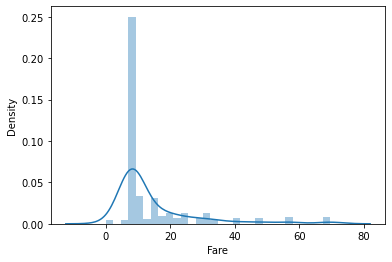

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 3) & (titan_new.Embarked == 'S')].Fare)

In [ ]:
indices = titan_new[(titan_new['Pclass'] == 2) & (titan_new['Embarked'] == 'S') & (titan_new['Fare'] >=50) ].index
titan_new.drop(indices , inplace=True)
titan_new[(titan_new.Pclass == 2) & (titan_new.Embarked == 'S')].Fare.max()

C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\2709116425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new.drop(indices , inplace=True)


39.0

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

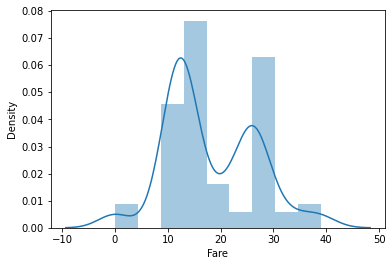

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 2) & (titan_new.Embarked == 'S')].Fare)

In [ ]:
indices = titan_new[(titan_new['Pclass'] == 1) & (titan_new['Embarked'] == 'S') & (titan_new['Fare'] >=115) ].index
titan_new.drop(indices , inplace=True)
titan_new[(titan_new.Pclass == 1) & (titan_new.Embarked == 'S')].Fare.max()

C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\1022762979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new.drop(indices , inplace=True)


93.5

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

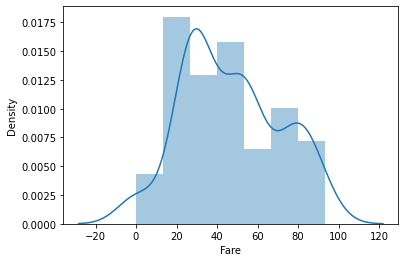

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 1) & (titan_new.Embarked == 'S')].Fare)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

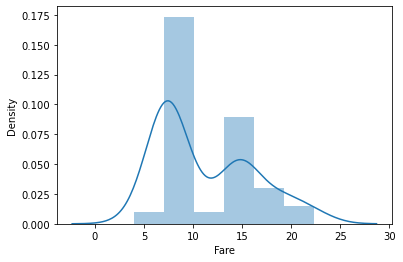

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 3) & (titan_new.Embarked == 'C')].Fare)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

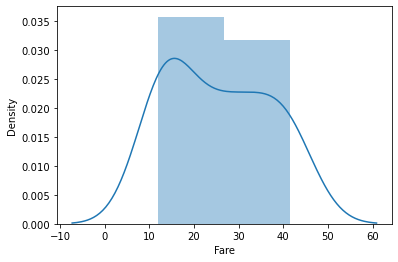

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 2) & (titan_new.Embarked == 'C')].Fare)

In [ ]:
indices = titan_new[ (titan_new['Pclass'] == 1) & (titan_new['Embarked'] == 'C') & (titan_new['Fare'] >=115) ].index
titan_new.drop(indices , inplace=True)
titan_new[(titan_new.Pclass == 1) & (titan_new.Embarked == 'C')].Fare.max()

C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\722118303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new.drop(indices , inplace=True)


113.275

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

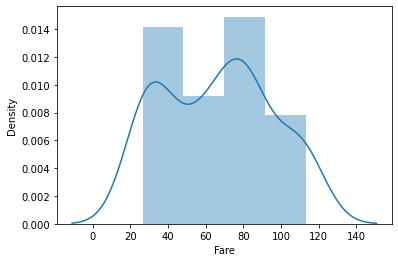

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 1) & (titan_new.Embarked == 'C')].Fare)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

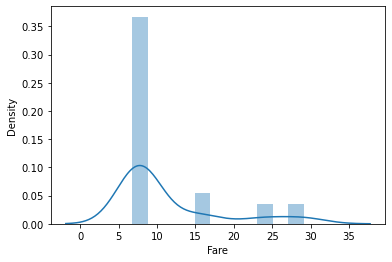

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 3) & (titan_new.Embarked == 'Q')].Fare)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

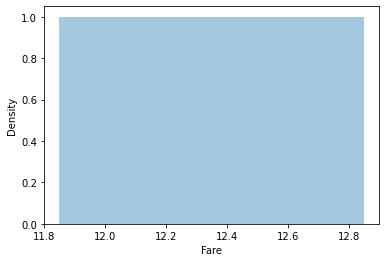

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 2) & (titan_new.Embarked == 'Q')].Fare)

C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

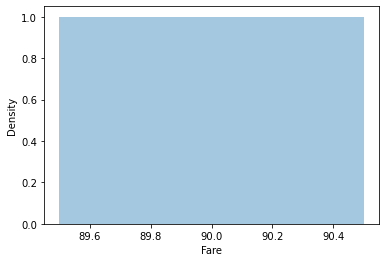

In [ ]:
sns.distplot(titan_new[(titan_new.Pclass == 1) & (titan_new.Embarked == 'Q')].Fare)

In [ ]:
# Deleting Fare == 0
indic=titan_new[titan_new['Fare']==0]

In [ ]:
for x in indic:
    titan_new.drop(titan_new[titan_new['Fare']==0].index,inplace=True)

C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\3096743145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new.drop(titan_new[titan_new['Fare']==0].index,inplace=True)


C:\Users\VibeX\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

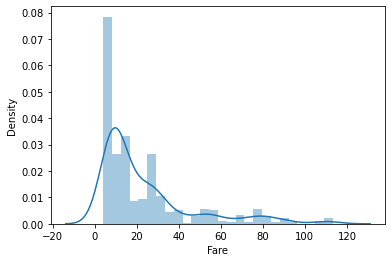

In [ ]:
sns.distplot(titan_new.Fare)

In [ ]:
titan_new['Age_new'] = np.log(titan_new['Age']+1)
titan_new['Fare_new'] = np.log(titan_new["Fare"]+1)

C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\1707467043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new['Age_new'] = np.log(titan_new['Age']+1)
C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\1707467043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new['Fare_new'] = np.log(titan_new["Fare"]+1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
titan_new[['Age_scaled']]= scale.fit_transform(titan_new[['Age']])
titan_new[['Fare_scaled']]= scale.fit_transform(titan_new[['Fare']])

C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\402820232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new[['Age_scaled']]= scale.fit_transform(titan_new[['Age']])
C:\Users\VibeX\AppData\Local\Temp\ipykernel_9548\402820232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titan_new[['Fare_scaled']]= scale.fit_transform(titan_new[['Fare']])


In [ ]:
titan_new = titan_new.drop('Sex', axis=1)
titan_new = titan_new.drop('Age_new', axis=1)
titan_new = titan_new.drop('Age_scaled', axis=1)
titan_new = titan_new.drop('Age', axis=1)

In [ ]:
titan_new_ohe = pd.get_dummies(titan_new) 
titan_new_ohe.head()

,Survived,Pclass,SibSp,Parch,Fare,Fare_new,Fare_scaled,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,2.110213,0.029630,0,0,1
1,1,1,1,0,71.2833,4.280593,0.615681,1,0,0
2,1,3,0,0,7.9250,2.188856,0.035808,0,0,1
3,1,1,1,0,53.1000,3.990834,0.449262,0,0,1
4,0,3,0,0,8.0500,2.202765,0.036952,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X = titan_new_ohe.drop('Fare', axis=1)
X = X.drop('Fare_new', axis=1)
X = X.drop('Fare_scaled', axis=1)
y = titan_new_ohe['Fare_new']

# split train data into two parts :  train - 80% and validation - 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_val)

0.1139370219227815

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_val)

0.23190493628126518

In [ ]:
lin_reg.coef_  , lin_reg.intercept_ 

(array([ 0.06269266, -0.70743673,  0.24031187,  0.21078613,  0.07879497,
        -0.00919989, -0.06959508]),
 4.387283805034193)

In [ ]:
print(y_val.min(), y_val.max())
print(y_pred.min(), y_pred.max())

2.0143428636837015 4.738607824217808
2.195378540827749 4.094516909938252


In [ ]:
print(y_val, '\n\n', y_pred)

208    2.169054
602    3.770459
283    2.202765
869    2.495954
864    2.639057
         ...   
781    4.060443
387    2.639057
425    2.110213
165    3.069215
785    2.110213
Name: Fare_new, Length: 206, dtype: float64 

 [2.3184664  3.610252   2.2580712  2.7091692  2.90281527 2.85755925
 2.3184664  2.96550793 2.3184664  2.25577373 2.90281527 2.43569041
 2.40646126 3.610252   2.58408046 2.90281527 2.19537854 2.2580712
 3.67294466 2.19537854 3.05120532 2.58408046 2.19537854 3.14312714
 3.35420985 2.3184664  3.67294466 2.19537854 3.17629406 2.90281527
 2.25577373 2.90281527 2.64647653 2.19537854 3.35391326 2.19537854
 2.19537854 3.91325653 2.7091692  3.82133471 2.25577373 3.82133471
 3.610252   2.19537854 2.19537854 3.33788639 3.67294466 2.90281527
 3.14312714 2.19537854 4.06164658 2.90281527 3.35391326 3.610252
 2.25577373 3.64089092 3.75864205 2.2580712  2.3184664  2.4960856
 4.06164658 3.12710027 3.36741213 2.19537854 2.82803351 2.3184664
 2.67600227 2.19537854 2.19537854 2.3184664  

In [ ]:
score=lin_reg.score(X_val, y_val)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_val)

0.7371421178811243

In [ ]:
adj_r = (1-((1-score)*(len(y)-1))/(len(y)-X.shape[1]-1))

In [ ]:
print("Adjusted R value is: ",round(adj_r*100,2))

Adjusted R value is:  78.77


In [ ]:
ypred = np.exp(y_pred)
ypred

array([10.16008081, 36.9753693 ,  9.56462316, 15.01679432, 18.22538256,
       17.41895963, 10.16008081, 19.40455693, 10.16008081,  9.54267393,
       18.22538256, 11.423703  , 11.09463053, 36.9753693 , 13.25109855,
       18.22538256,  8.983401  ,  9.56462316, 39.36765971,  8.983401  ,
       21.14081051, 13.25109855,  8.983401  , 23.17622886, 28.6229788 ,
       10.16008081, 39.36765971,  8.983401  , 23.95780258, 18.22538256,
        9.54267393, 18.22538256, 14.10425511,  8.983401  , 28.61449078,
        8.983401  ,  8.983401  , 50.0617141 , 15.01679432, 45.66511739,
        9.54267393, 45.66511739, 36.9753693 ,  8.983401  ,  8.983401  ,
       28.15954548, 39.36765971, 18.22538256, 23.17622886,  8.983401  ,
       58.0698489 , 18.22538256, 28.61449078, 36.9753693 ,  9.54267393,
       38.12578865, 42.89014364,  9.56462316, 10.16008081, 12.1349    ,
       58.0698489 , 22.80774715, 29.00337296,  8.983401  , 16.91217041,
       10.16008081, 14.52690248,  8.983401  ,  8.983401  , 10.16

In [ ]:
ypred.min(),ypred.max()

(8.983400997320153, 60.010341754132355)

In [ ]:
y_val = np.exp(y_val)

In [ ]:
y_val.min(),y_val.max()

(7.4958, 114.27499999999996)